In [10]:
using Plots

In [20]:
# Define the Euclidean distance function
function euclidean_distance(p1, p2)
    √((p1[1] - p2[1])^2 + (p1[2] - p2[2])^2)
end


euclidean_distance (generic function with 1 method)

In [21]:
# Function to classify the test point based on K
function classify_test_point(k, distances)
    # Get the k nearest neighbors
    neighbors = distances[1:k]
    
    # Count the classes of the neighbors
    class_count = Dict(0 => 0, 1 => 0)
    for neighbor in neighbors
        class_count[neighbor[2]] += 1
    end
    
    # Classify based on majority vote
    classification = class_count[1] > class_count[0] ? 1 : 0
    return classification
end

classify_test_point (generic function with 1 method)

In [22]:
# Define the points and the test point
circles = [(1, 3), (3, 2), (3, 4)] # Class 1
bars = [(2, 1), (2, 2), (4, 1), (4, 3)] # Class 0
test_point = (3, 3)

(3, 3)

In [23]:
# Calculate distances and associate with class labels
distances = [(euclidean_distance(test_point, p), 1) for p in circles]
append!(distances, [(euclidean_distance(test_point, p), 0) for p in bars])

# Sort by distance
sort!(distances, by=x->x[1])

# Classify the test point for different values of K
k_values = [1, 3, 5]
classifications = Dict(k => classify_test_point(k, distances) for k in k_values)


Dict{Int64, Int64} with 3 entries:
  5 => 1
  3 => 1
  1 => 1

In [24]:
# Print the classifications
for (k, class) in classifications
    println("For K = $k, the test point is classified as class $class")
end

For K = 5, the test point is classified as class 1
For K = 3, the test point is classified as class 1
For K = 1, the test point is classified as class 1


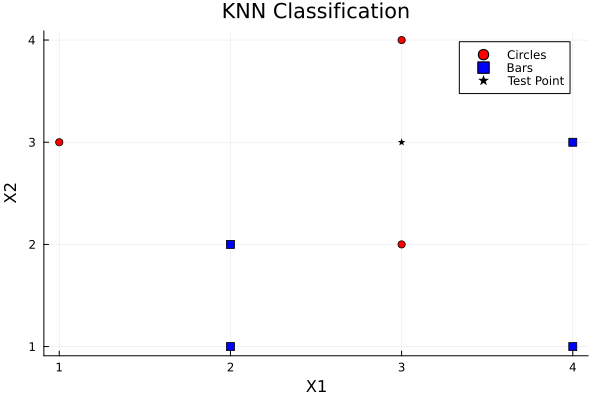

In [25]:
# Scatter plot for circles (Class 1)
scatter([p[1] for p in circles], [p[2] for p in circles], label="Circles", color="red")

# Scatter plot for bars (Class 0)
scatter!([p[1] for p in bars], [p[2] for p in bars], label="Bars", color="blue", shape=:square)

# Add the test point
scatter!([test_point[1]], [test_point[2]], label="Test Point", color="black", shape=:star)

# Show the plot
plot!(xlabel="X1", ylabel="X2", title="KNN Classification")
